In [69]:
from translate import *
from PIL import Image
import numpy as np
%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

MULTIPLIER = 256 / 42

Populating the interactive namespace from numpy and matplotlib


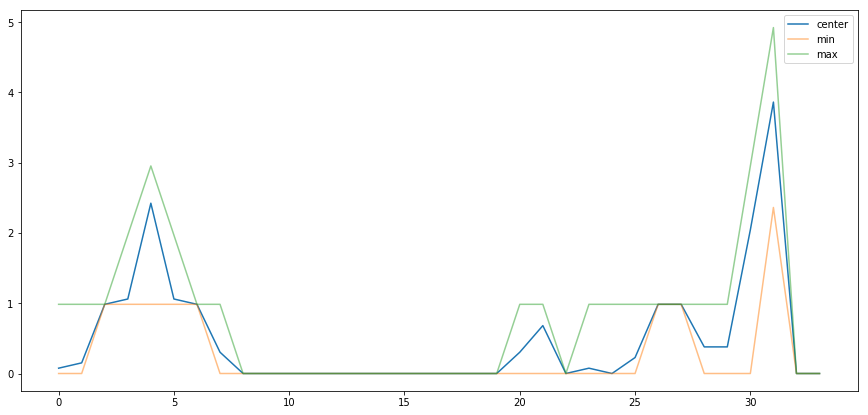

In [96]:
os.chdir("/home/nikita/Code/pluie")
home = 4.378878, 50.830699
antwep = 4.418660, 51.0790852

s = []
for i in range(0, 34):
    image = Image.open("gray/%05i.tiff" % i)
    pixels = np.array(image)
    s.append(stats(pixels, antwep[0], antwep[1]))


plt.plot([x['center'] / MULTIPLIER for x in s], label="center")
plt.plot([x['min'] / MULTIPLIER for x in s], label="min", alpha=0.5)
plt.plot([x['max'] / MULTIPLIER for x in s], label="max", alpha=0.5)
plt.legend()

plt.show()


In [97]:
from scipy.interpolate import interp1d
y = [x['center'] / MULTIPLIER for x in s]
x = np.linspace(0, 34, num=34, endpoint=True)
f2 = interp1d(x, y, kind='cubic')


(0, 34)

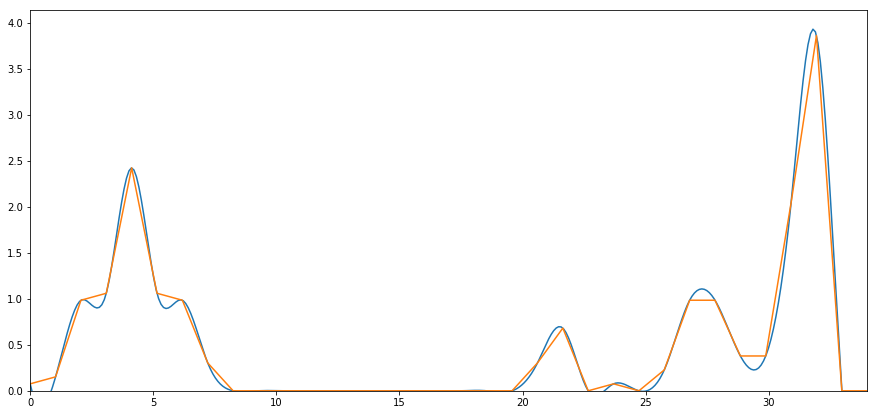

In [98]:
xnew = np.linspace(0, 33, num=33*10, endpoint=True)
plt.plot(xnew, f2(xnew))
plt.plot(x, y)
plt.ylim(0)
plt.xlim(0, 34)

<BarContainer object of 34 artists>

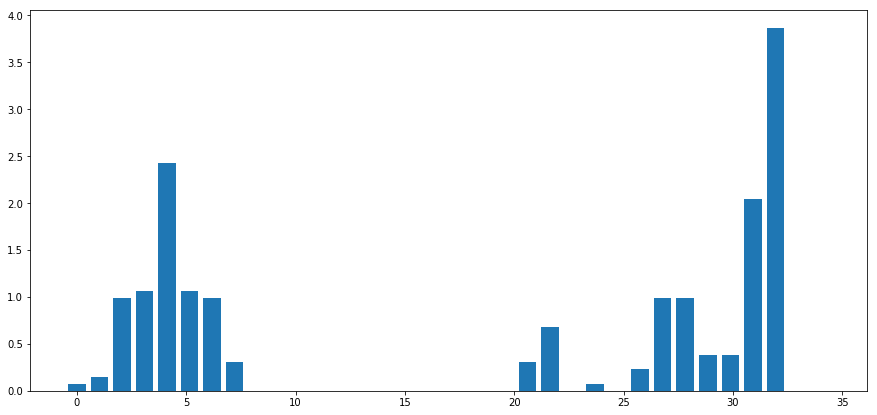

In [99]:
plt.bar(x, y)

In [83]:
import new.curve

In [118]:
import os
os.chdir('new')

In [129]:
curves = new.curve.get_curve(*antwep)

<BarContainer object of 34 artists>

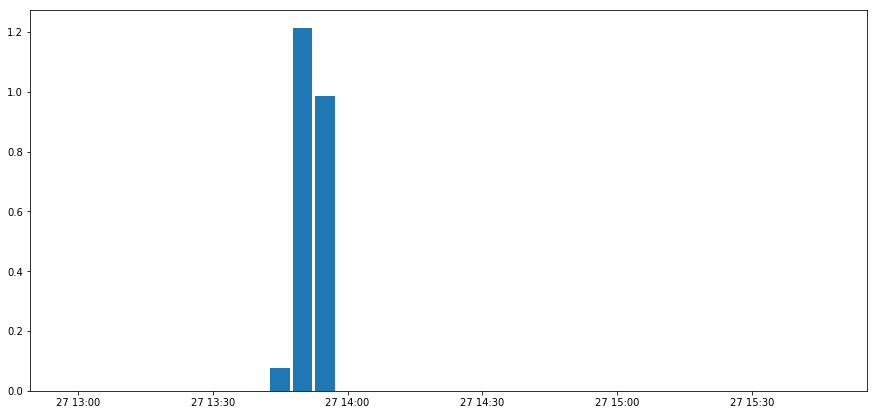

In [130]:
plt.bar([x['instant'] for x in curves], [x['center'] for x in curves], width=0.003)